In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from keras.models import Sequential
%matplotlib inline

from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Convolution2D,MaxPooling2D
from keras.utils import np_utils



import tensorflow as tf
import keras.backend.tensorflow_backend as tfback
#...ba bla
print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

import keras.backend.tensorflow_backend as tfback


Using TensorFlow backend.


tf.__version__ is 2.2.0-rc2
tf.keras.__version__ is: 2.3.0-tf


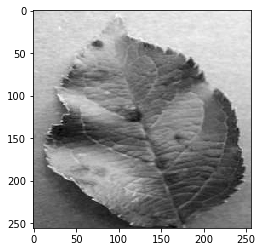

(256, 256)
[[168 167 166 ... 186 184 182]
 [171 170 169 ... 187 185 184]
 [171 170 169 ... 189 187 186]
 ...
 [ 97  99 101 ... 118 118 118]
 [ 98  99 100 ... 114 115 115]
 [101 100  99 ... 113 114 115]]


In [2]:
DATADIR = "E:/datasets for machine learning/plant_dataset/plant/plant-dataset/dataset/train"

CATEGORIES = ["Apple___Apple_scab", "Apple___Black_rot","Apple___Cedar_apple_rust","Apple___healthy"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show() 
        
        
        break
      
    break


print(img_array.shape)


print(img_array)

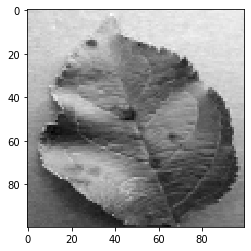

array([[169, 167, 168, ..., 188, 189, 184],
       [169, 167, 166, ..., 187, 189, 188],
       [172, 175, 175, ..., 187, 185, 184],
       ...,
       [102, 100, 103, ..., 114, 109, 114],
       [101,  99,  96, ..., 119, 121, 120],
       [ 99, 100,  98, ..., 111, 112, 115]], dtype=uint8)

In [3]:

img_size=100
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()
new_array


In [4]:

training_data = []

def create_training_data():
    for category in CATEGORIES:  # bike and cars and
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  
        for img in os.listdir(path): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (img_size, img_size))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                print("hi")
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))





x=len(training_data)
x


2537


2537

In [5]:
import random

random.shuffle(training_data)




for sample in training_data[:10]:
    print(sample[1])



X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(len(X),1,img_size,img_size)




0
3
0
3
3
3
3
3
0
1


In [6]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()














In [7]:


pickle_in=open("X.pickle","rb")
pickle.load(pickle_in)
X=X/255.0
X.shape
y=np_utils.to_categorical(y,4)


In [8]:
def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]


tfback._get_available_gpus = _get_available_gpus



model=Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(1,100,100),data_format='channels_first'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='softmax'))

help(model.compile)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

X=model.fit(X,y,batch_size=5,epochs=5,verbose=1)


Help on method compile in module keras.engine.training:

compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Configures the model for training.
    
    # Arguments
        optimizer: String (name of optimizer) or optimizer instance.
            See [optimizers](/optimizers).
        loss: String (name of objective function) or objective function or
            `Loss` instance. See [losses](/losses).
            If the model has multiple outputs, you can use a different loss
            on each output by passing a dictionary or a list of losses.
            The loss value that will be minimized by the model
            will then be the sum of all individual losses.
        metrics: List of metrics to be evaluated by the model
            during training and testing. Typically you will use
            `metrics=['accuracy']`. To specify diffe

In [9]:
#summary of the model
summery=model.summary()
print(summery)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 98, 98)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 49, 98)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               9834624   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 16)               

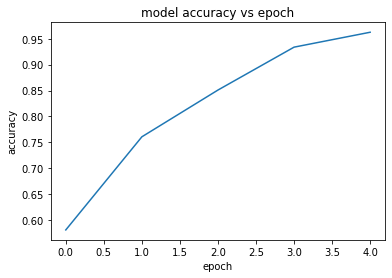

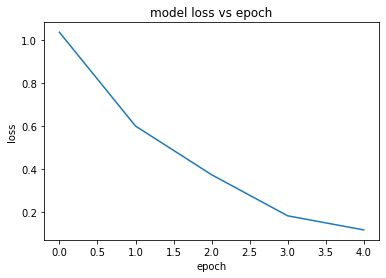

In [10]:
#Graph ploting betwwen epach vs accuracy and eppoch vs loss
#sumarize the history for accuracy
plt.plot(X.history["accuracy"])
plt.title('model accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(X.history['loss'])
plt.title('model loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [11]:
from keras.models import load_model
model.save("saved_model1.hs")
loaded_model=load_model("saved_model1.hs")

In [12]:
#prediction of img for give path in Test_Data_Dir
Test_Data_Dir='E:/datasets for machine learning/plant_dataset/plant/test'
prediction_list=[]
def prepare_prediction_data(filepath):
    for img in os.listdir(filepath):
        img_array=cv2.imread(os.path.join(filepath, img),cv2.IMREAD_GRAYSCALE)
        resize_image=cv2.resize(img_array,(100,100))
        prediction_list.append([resize_image])
    new_array=np.array(prediction_list)
    return new_array.reshape(len(prediction_list),1,100,100)
prediction=loaded_model.predict([prepare_prediction_data(Test_Data_Dir)])
#print(prediction)
image_index=[]
for img_array in prediction:
    for img_label_index in range(len(img_array)):
        if(img_array[img_label_index]==1):
            image_index.append(img_label_index)
            print(img_label_index)



1
1
1
0


Real Image vs Prediction
-----------------------------------
-----------------------------------


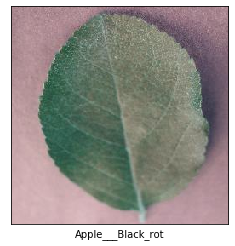

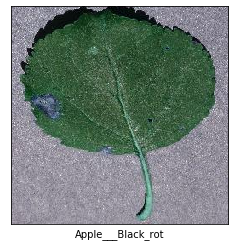

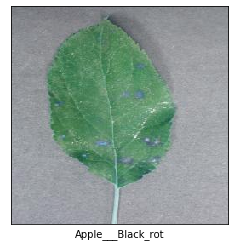

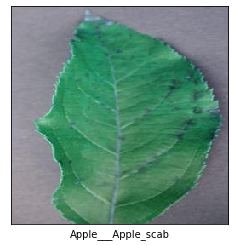

In [14]:
#Graph ploting image vs prediction
image_for_plot=[]   #image list for ploting
image_name=[]    #for storing the index of the category(predicted)
i=0
print("Real Image vs Prediction")
print("-----------------------------------")
print("-----------------------------------")
def prepare_plot_data(filepath):
    for img,label in zip(os.listdir(filepath),image_index):
        image_name.append(os.path.split(img)[-1])
        img_array=cv2.imread(os.path.join(filepath, img))
        plt.imshow(img_array)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(CATEGORIES[label])
        plt.show()
    return None
prepare_plot_data("E:/datasets for machine learning/plant_dataset/plant/test")

In [14]:
#writing a csv file
import csv
 
myData = ["Image_Name","Image_Label"]
s=","
myFile = open('Prediction.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerow(myDatCategoriesa)
    for im_name,im_label in zip(image_name,image_index):
        line=[im_name,[im_label]]
        writer.writerow(line)
print("Writing complete")
myFile.close()

NameError: name 'myDatCategoriesa' is not defined